# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# !pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# weather_api_key

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


643

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_df=pd.DataFrame(cities)
cities_df.columns=['City']
cities_df.head(5)

,City
0,mataura
1,pirapemas
2,taolanaro
3,vaini
4,rikitea


In [5]:
# Add columns for lat, lng, airport name, airport address, airport rating
# Note that we used "" to specify initial entry.
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,,,,,,,,
1,pirapemas,,,,,,,,
2,taolanaro,,,,,,,,
3,vaini,,,,,,,,
4,rikitea,,,,,,,,


In [8]:
# # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city='cape town'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
# print(json.dumps(response, indent=4, sort_keys=True))
# lat= response["clouds"]['all']
# lat

In [10]:
for index, row in cities_df.iterrows():
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city=row["City"]
   
      # make request
    response = requests.get(query_url + city).json()
    
    try:           
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]= response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        print(f'Processing Record {index} of Set 1 | {city}')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
# Visualize to confirm lat lng appear
cities_df.head()

Processing Record 0 of Set 1 | mataura
Processing Record 1 of Set 1 | pirapemas
Missing field/result... skipping.
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | inuvik
Processing Record 6 of Set 1 | pajapan
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | warri
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | khvoynaya
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | san miguel
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | novikovo
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | atuona
Processing Record 24

Missing field/result... skipping.
Processing Record 200 of Set 1 | mirabad
Processing Record 201 of Set 1 | hermon
Processing Record 202 of Set 1 | placido de castro
Processing Record 203 of Set 1 | souillac
Processing Record 204 of Set 1 | cap malheureux
Processing Record 205 of Set 1 | kodiak
Processing Record 206 of Set 1 | leningradskiy
Processing Record 207 of Set 1 | carnarvon
Processing Record 208 of Set 1 | westport
Processing Record 209 of Set 1 | vestmannaeyjar
Processing Record 210 of Set 1 | laguna
Processing Record 211 of Set 1 | beyneu
Missing field/result... skipping.
Processing Record 213 of Set 1 | port macquarie
Processing Record 214 of Set 1 | la paz
Processing Record 215 of Set 1 | esna
Processing Record 216 of Set 1 | ust-kuyga
Processing Record 217 of Set 1 | tucuman
Processing Record 218 of Set 1 | bengkulu
Processing Record 219 of Set 1 | brae
Processing Record 220 of Set 1 | longyearbyen
Processing Record 221 of Set 1 | kyshtovka
Processing Record 222 of Set 1 

Processing Record 395 of Set 1 | huarmey
Missing field/result... skipping.
Processing Record 397 of Set 1 | baculin
Processing Record 398 of Set 1 | kousseri
Processing Record 399 of Set 1 | arnstadt
Processing Record 400 of Set 1 | bilibino
Processing Record 401 of Set 1 | arman
Processing Record 402 of Set 1 | sao goncalo dos campos
Processing Record 403 of Set 1 | cururupu
Processing Record 404 of Set 1 | gambela
Processing Record 405 of Set 1 | grindavik
Processing Record 406 of Set 1 | karacakoy
Processing Record 407 of Set 1 | manggar
Missing field/result... skipping.
Processing Record 409 of Set 1 | strelka
Processing Record 410 of Set 1 | dalmatovo
Processing Record 411 of Set 1 | gat
Processing Record 412 of Set 1 | guerrero negro
Processing Record 413 of Set 1 | basco
Processing Record 414 of Set 1 | fairbanks
Processing Record 415 of Set 1 | tuatapere
Processing Record 416 of Set 1 | gandiaye
Processing Record 417 of Set 1 | krasnoselkup
Processing Record 418 of Set 1 | olin

Processing Record 594 of Set 1 | nioro
Processing Record 595 of Set 1 | aloleng
Processing Record 596 of Set 1 | port augusta
Processing Record 597 of Set 1 | tuy hoa
Processing Record 598 of Set 1 | simplicio mendes
Processing Record 599 of Set 1 | roebourne
Processing Record 600 of Set 1 | anori
Processing Record 601 of Set 1 | nueve de julio
Processing Record 602 of Set 1 | tchaourou
Processing Record 603 of Set 1 | mountain home
Processing Record 604 of Set 1 | baykit
Processing Record 605 of Set 1 | sao filipe
Processing Record 606 of Set 1 | port hedland
Processing Record 607 of Set 1 | aleksandrov gay
Processing Record 608 of Set 1 | chotila
Processing Record 609 of Set 1 | moussoro
Processing Record 610 of Set 1 | zaysan
Processing Record 611 of Set 1 | birin
Processing Record 612 of Set 1 | luba
Processing Record 613 of Set 1 | auki
Processing Record 614 of Set 1 | abu ghosh
Processing Record 615 of Set 1 | martapura
Processing Record 616 of Set 1 | russkaya polyana
Processing

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.864,77,52,99,18.99,NZ,1611612578
1,pirapemas,-3.7267,-44.2233,76.41,92,100,2.33,BR,1611612578
2,taolanaro,,,,,,,,
3,vaini,-21.2,-175.2,82.4,83,40,13.8,TO,1611612579
4,rikitea,-23.1203,-134.969,79.74,71,1,13.85,PF,1611612579


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
cities_df.to_csv("City_data.csv")
cities_df.head(5)
# cities_df.to_numeric("Lat")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.864,77,52,99,18.99,NZ,1611612578
1,pirapemas,-3.7267,-44.2233,76.41,92,100,2.33,BR,1611612578
2,taolanaro,,,,,,,,
3,vaini,-21.2,-175.2,82.4,83,40,13.8,TO,1611612579
4,rikitea,-23.1203,-134.969,79.74,71,1,13.85,PF,1611612579


In [12]:
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')
cities_df['Lat']=pd.to_numeric(cities_df['Lat'],errors='coerce')
cities_df['Lng']=pd.to_numeric(cities_df['Lng'],errors='coerce')
cities_df['Max Temp']=pd.to_numeric(cities_df['Max Temp'],errors='coerce')
cities_df['Humidity']=pd.to_numeric(cities_df['Humidity'],errors='coerce')
cities_df['Cloudiness']=pd.to_numeric(cities_df['Cloudiness'],errors='coerce')
cities_df['Wind Speed']=pd.to_numeric(cities_df['Wind Speed'],errors='coerce')
cities_df['Date']=pd.to_numeric(cities_df['Date'],errors='coerce')
# cities_df.dtypes

In [13]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,19.623726,13.997654,49.407061,75.104730,56.484797,8.362753,1.611613e+09
std,33.662367,90.432397,32.948688,18.352329,38.263002,6.248113,6.259217e+01
min,-54.800000,-179.166700,-61.600000,15.000000,0.000000,0.540000,1.611612e+09
25%,-7.847000,-65.243225,28.400000,66.000000,20.000000,3.490000,1.611613e+09
50%,21.962600,19.575600,61.835000,79.000000,75.000000,6.910000,1.611613e+09
75%,48.645850,92.821100,77.000000,88.000000,93.000000,11.500000,1.611613e+09
max,78.218600,179.316700,99.280000,100.000000,100.000000,33.960000,1.611613e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
index_names = cities_df[(cities_df['Humidity'] > 100)].index
index_names

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_clean=cities_df.drop(index_names, inplace = False)
cities_clean.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,19.623726,13.997654,49.407061,75.104730,56.484797,8.362753,1.611613e+09
std,33.662367,90.432397,32.948688,18.352329,38.263002,6.248113,6.259217e+01
min,-54.800000,-179.166700,-61.600000,15.000000,0.000000,0.540000,1.611612e+09
25%,-7.847000,-65.243225,28.400000,66.000000,20.000000,3.490000,1.611613e+09
50%,21.962600,19.575600,61.835000,79.000000,75.000000,6.910000,1.611613e+09
75%,48.645850,92.821100,77.000000,88.000000,93.000000,11.500000,1.611613e+09
max,78.218600,179.316700,99.280000,100.000000,100.000000,33.960000,1.611613e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

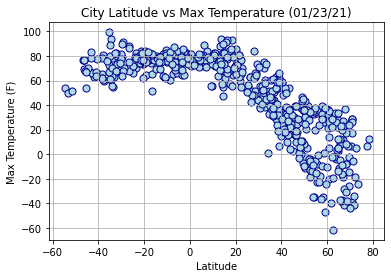

In [21]:
chart1 = cities_clean.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Max Temperature (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Figure 1.png')

This plot is measuring the max temperature reading as you move across the latitude range.  You can see the hot, to mild, to cold temparature change as one moved from negative to positive latitude measures.  It looks like I don't have much representation in the negative latitude range to form a more expected low to high to low pattern.


## Latitude vs. Humidity Plot

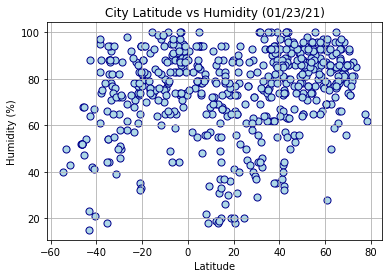

In [22]:
chart2 = cities_clean.plot.scatter(x='Lat',
                      y='Humidity',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Humidity (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Figure 2.png')

This plot is measuring the humidity reading as you move across the latitude range.  There doesn't appear to be too much correlation between the lat and humidity readings.


## Latitude vs. Cloudiness Plot

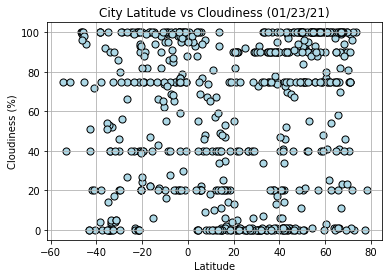

In [23]:
chart3 = cities_clean.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Cloudiness (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Figure 3.png')

This chart is examining latitude to cloudiness %'s as one moves across the latitude ranges.  Another one with not alot of correlation other than some linear trends occuring across the spectrum.

## Latitude vs. Wind Speed Plot

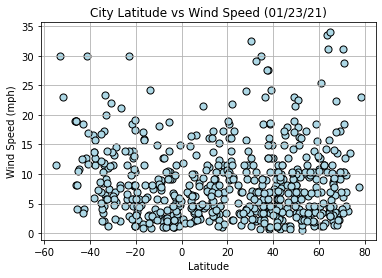

In [24]:
chart4 = cities_clean.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Wind Speed (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Figure 4.png')

Another chart examining the measure of wind speeds as one moves across the latitude range.  Not much obvious correlation or clustering here.

## Linear Regression

In [25]:
NorthData = cities_clean[cities_clean['Lat'] > 0] 
SouthData = cities_clean[cities_clean['Lat'] < 0] 
# Equator=cities_clean[cities_clean['Lat'] == 0] 
# Equator

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7060364492886175


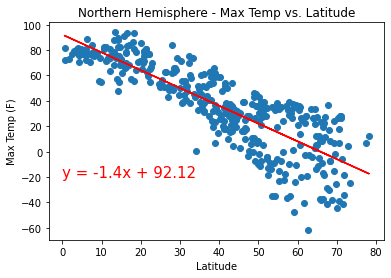

In [30]:
x_values = NorthData['Lat']
y_values = NorthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(0,-20))

plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1181162889257882


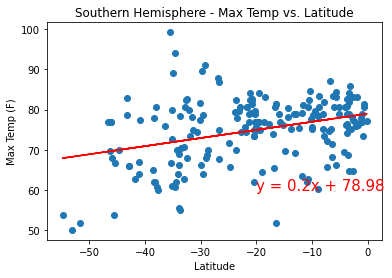

In [31]:
x_values = SouthData['Lat']
y_values = SouthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(-20,60))

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

The two graphs are looking for linear correlation between Latitude measure progress from low to high.  This is why we had to separate the hemisphers.  As you can see there is a strong correlation in the northern hemisphere but not as much in the Southern.  The charts trend as expected, negative as you go warmer to colder in north and warmer as you approach 0 in the Southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09590212785760768


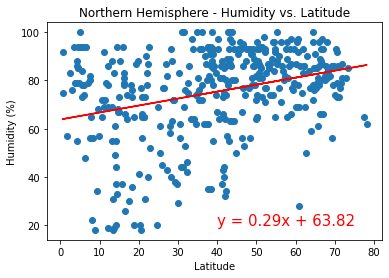

In [33]:
x_values = NorthData['Lat']
y_values = NorthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(40,20))

plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21427596595139467


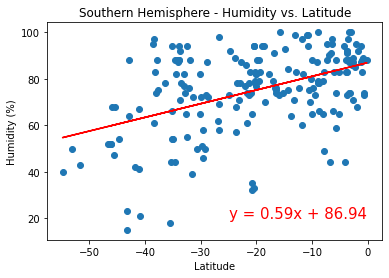

In [35]:
x_values = SouthData['Lat']
y_values = SouthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red",xytext=(-25, 20))

plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

These two charts are looking for linear correlation between humidity and latitude across the two hemispherers.  You find mild correlation across both but the south having over a double r-squared measurement.  This makes sense given the rather randomness of the north plot relative to the south plot.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08327525668005221


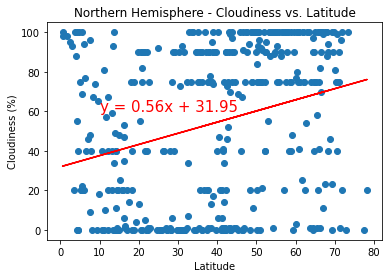

In [38]:
x_values = NorthData['Lat']
y_values = NorthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red",xytext=(10,60))

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.064076322812153


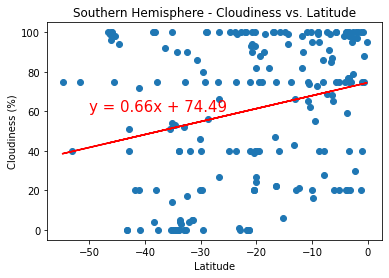

In [39]:
x_values = SouthData['Lat']
y_values = SouthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(-50,60))

plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

As expected from the initial scatter plot, there is not much correlation between cloudiness and either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006025190794298253


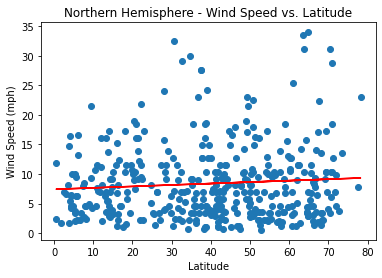

In [42]:
x_values = NorthData['Lat']
y_values = NorthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(10,30))

plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1908161653784972


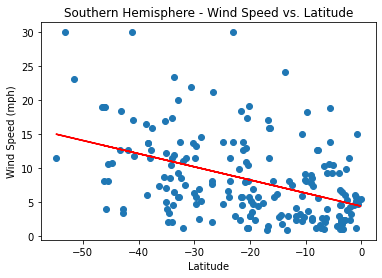

In [43]:
x_values = SouthData['Lat']
y_values = SouthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red", xytext=(-50,30))

plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

Interestingly, practically no correlation between wind and measures in the north but relatively much more in the south.  With that said, there is not strong clustering in either, visually leading to not relying too much on the prediction or correlation.